# Fiducial Cosmological Quantities

In [1]:
import os, sys

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import AutoMinorLocator
from nbodykit.cosmology import Planck15

sys.path.insert(0, "".join([os.getcwd(), "/../"]))

from config.program import data_dir, stylesheet
from horizonground.clustering_modification import (
    relativistic_correction_factor,
    relativistic_correction_func,
)
from horizonground.lumfunc_modeller import LumFuncModeller, quasar_PLE_lumfunc

plt.style.use(stylesheet)

gallery = data_dir/"output"/"publication"/"PLE_model"/"gallery"

In [2]:
z = np.r_[np.arange(0.7, 2.101, 0.1), 2.17, 2.23, np.arange(2.3, 4.1, 0.1)]

bias = lambda z: 1.2 / Planck15.scale_independent_growth_factor(z)
growth_rate = Planck15.scale_independent_growth_rate

## Bias and growth rate

Text(0.5, 0, '$z$')

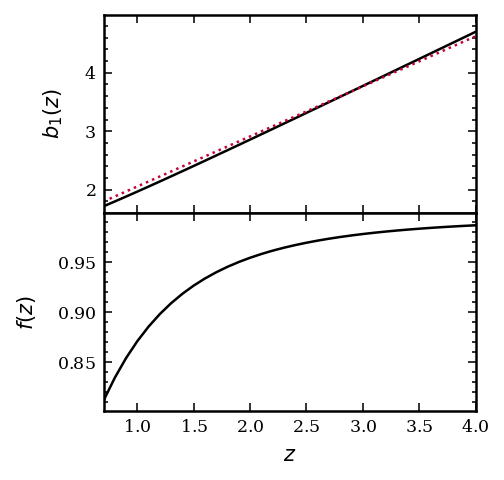

In [3]:
fig = plt.figure("linear bias and growth", figsize=(3.2, 3.5), dpi=150)

bias_plot = plt.subplot2grid((2, 1), (0, 0))

bias_plot.plot(z, bias(z))
bias_plot.plot(z, 1.2 + 0.856*z, ls=':')  # a linear approximation

bias_plot.tick_params(axis='x', which='both', labelbottom=False)
bias_plot.yaxis.set_minor_locator(AutoMinorLocator())
bias_plot.set_ylim(1.6, 4.99)
bias_plot.set_ylabel(r"$b_1(z)$", labelpad=9)

growth_plot = plt.subplot2grid((2, 1), (1, 0), sharex=bias_plot)

growth_plot.plot(z, growth_rate(z))

growth_plot.yaxis.set_minor_locator(AutoMinorLocator())
growth_plot.set_ylim(0.801, 0.999)
growth_plot.set_ylabel(r"$f(z)$", labelpad=9)
growth_plot.set_xlim(min(z), max(z))
growth_plot.set_xlabel(r"$z$", labelpad=5)

# fig.savefig(gallery/"bias_and_growth.pdf")

## Constant bias comparison

In [4]:
PLE_model = LumFuncModeller.from_parameter_file(
    parameter_file=data_dir/"input"/"cabinet"/"QSO_LF_PLE_model_poisson.txt",
    model_lumfunc=quasar_PLE_lumfunc,
    brightness_variable='magnitude',
    threshold_value=-25.,
    cosmology=Planck15
)

In [5]:
g_1 = np.vectorize(relativistic_correction_func(
    1, 
    evolution_bias=PLE_model.evolution_bias,
    # lambda z: np.zeros_like(z) # 
    magnification_bias=PLE_model.magnification_bias,
    # lambda z: 0.4 * np.ones_like(z) # 
))

g_2 = np.vectorize(relativistic_correction_func(
    2,
    evolution_bias=PLE_model.evolution_bias,
    # lambda z: np.zeros_like(z) # 
    magnification_bias=PLE_model.magnification_bias,
    # lambda z: 0.4 * np.ones_like(z) # 
))

g_3 = np.vectorize(lambda z:
    3 * 1.27 * 1.686 * 1 * (bias(z) - 1.6) * Planck15.Om(z) \
    * Planck15.to_astropy().scale_factor(z) / Planck15.scale_independent_growth_factor(z)
)

Text(0.5, 0, '$z$')

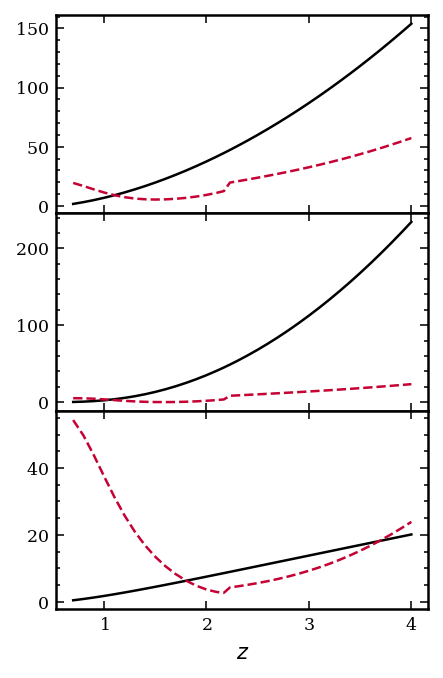

In [6]:
fig = plt.figure("big or small", figsize=(3.2, 5.25), dpi=150)

zero_one = plt.subplot2grid((3, 1), (0, 0))

zero_one.plot(z, (2 * bias(z) + 2./3. * growth_rate(z)) * g_3(z), ls='-')
zero_one.plot(z, 2 * bias(z) * g_2(z) + 2./3. * growth_rate(z) * g_2(z) + 1./3. * growth_rate(z)**2 * g_1(z)**2, ls='--')

zero_one.tick_params(axis='x', which='both', labelbottom=False)
zero_one.yaxis.set_minor_locator(AutoMinorLocator())

zero_two = plt.subplot2grid((3, 1), (1, 0), sharex=zero_one)

zero_two.plot(z, g_3(z)**2, ls='-')
zero_two.plot(z, g_2(z)**2, ls='--')

zero_two.tick_params(axis='x', which='both', labelbottom=False)
zero_two.yaxis.set_minor_locator(AutoMinorLocator())
two_one = plt.subplot2grid((3, 1), (2, 0), sharex=zero_one)

two_one.plot(z, 4./3. * g_3(z) * growth_rate(z), ls='-')
two_one.plot(z, 4./3. * growth_rate(z) * g_2(z) + 2./3. * growth_rate(z)**2 * g_1(z)**2, ls='--')

two_one.yaxis.set_minor_locator(AutoMinorLocator())
two_one.set_xlabel(r"$z$", labelpad=5)

# fig.savefig(gallery/"big_or_small.pdf")